<a href="https://colab.research.google.com/github/pranay-baid/Customer-Churn-Analysis/blob/main/Churn%20Analysis%20for%20Telecom%20Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Analysis in Telecom Sector

### 1.1 Introduction

Telecom is basically a subscription business wherein the consumer subscribes on a monthly or annual basis to gain mobile network as well as internet access.

What we are trying to analyze with this project is the customer churn in the business. Churn is basically defined as a customer being subscribed with the business and then opting out of the subscription.

Churn is very common and our ultimate aim is to -

1. First analyse which all customers are churning out and what possibly the reason might be. Here, the demographics, gender, age of the consumer and many more factors would play a role in understanding the same. This typically is descriptive analytics wherein we are trying to gain insights on the already occuring churn activity.

2. After completion of Exploratory Data Analysis on our churn, try and predict if a given customer might churn out and what the actual value of the consumer not churning would have been. Here predictive analytics comes to play where we try and predict the churn and try to understand what can the churn rate be realistically brought down to.

3. Once we have predicted, we would then understand the cost to retain the particular customer and how that can aid to growth. Also, the job now is to strategize on how to retain the churning consumers. This is what we would describe as prescriptive analytics wherein we are working on the predicted outcomes.

### 1.2 Data Science

We will be trying to use various data science specific libraries and tools to work on the project. Given the big data quantity and useful qualities, it is possible to derive insights and create predictions from the data. It is possible to obtain the best forecasts for our models after sufficient training and hyperparameter tuning. We are taking the output variable (Customer Churn) and attempting to develop prediction models with a wide set of features.



### 1.3 Metrics

Because we're working on a classification problem, we need to make sure we pick metrics that are appropriate for this type of task. Below are the metrics that we are going to be using for our problem. 

1. Log Loss 
2. Accuracy
3. Precision
4. Recall
5. F1-score

### 1.4 Source 

We have used a sample dataset from Kaggle.

https://www.kaggle.com/blastchar/telco-customer-churn

In [379]:
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

In [380]:

df=pd.read_csv("dataset.csv")

In [381]:
print("{}".format(df.shape))

(7043, 21)


It seems we have data of about 7043 customers for which we are using about 20 different factors to analyse behaviour.

In [382]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Gender Factor

In [383]:
def countplot_function(dataframe, column, figsize = (15, 10), palette = "viridis"):
    plt.figure(figsize = figsize)
    sns.countplot(dataframe[column], palette = palette)
    plt.title("{} countplot".format(column), fontsize = 15)
    plt.xlabel("{}".format(column), fontsize = 10)
    plt.show()

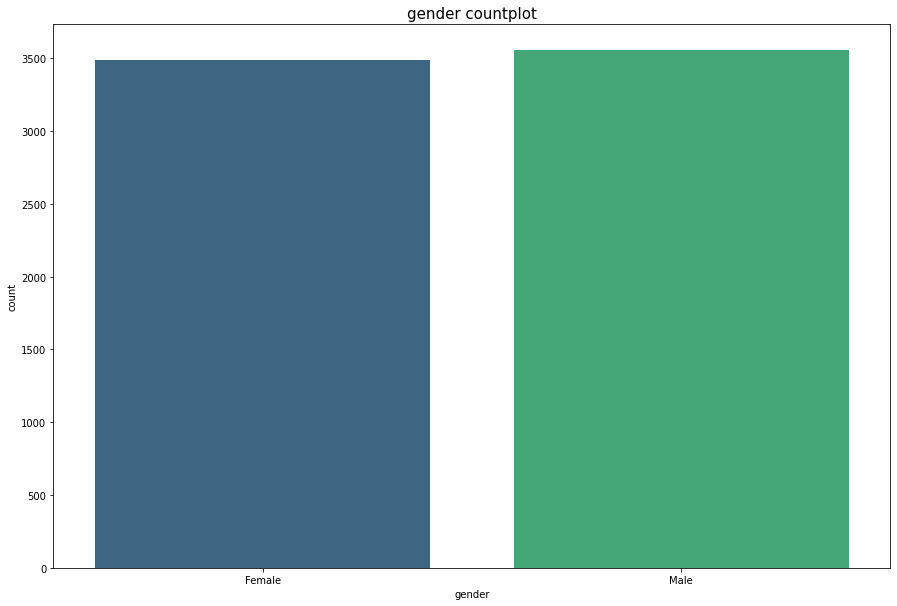

In [384]:
countplot_function(dataframe = df, column = 'gender')

There are exact equal number of males and females in this dataset.

## Partner Factor

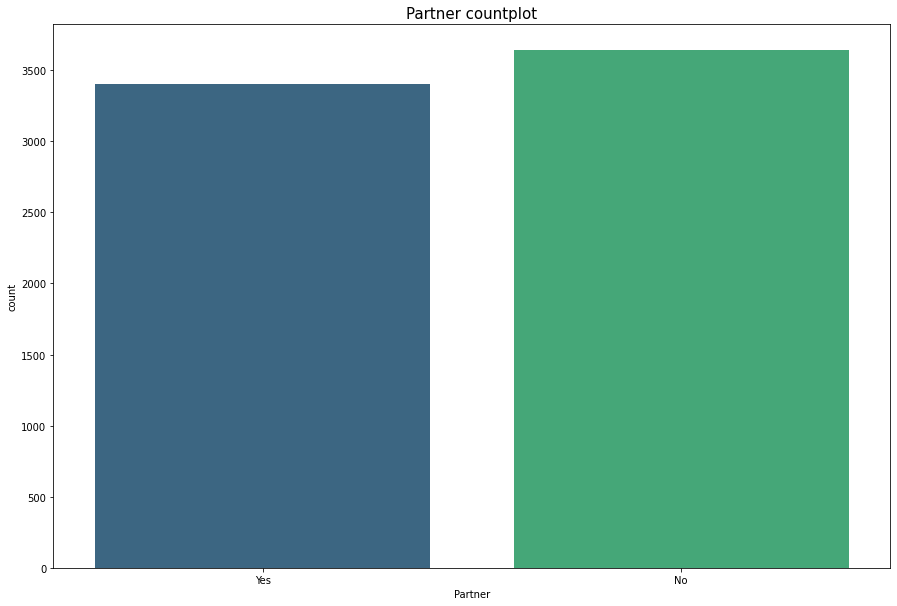

In [385]:
countplot_function(dataframe = df, column = "Partner")

In the dataset, there are more people not having a partner than those having a partner. This should give us an idea to predict churn.

## InternetService Factor

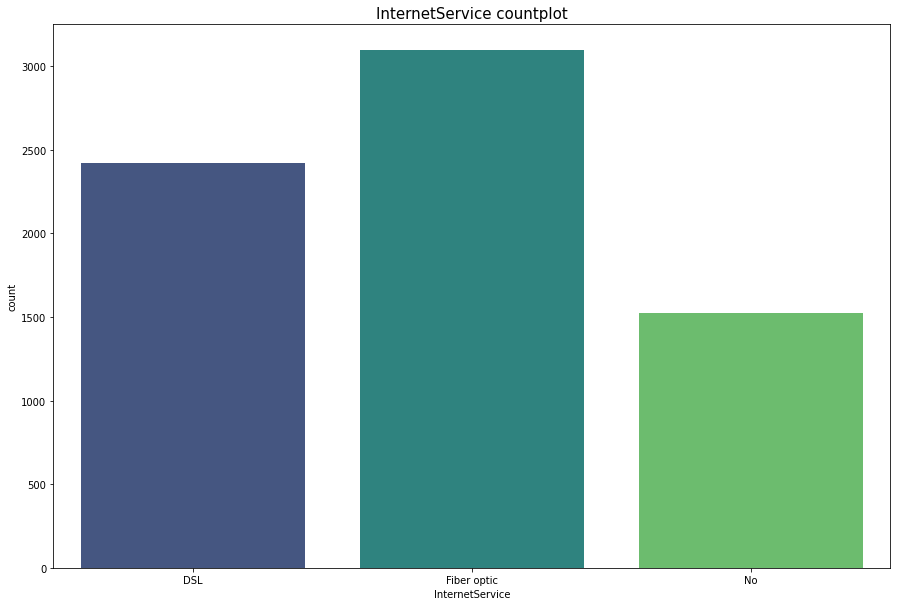

In [386]:
countplot_function(dataframe = df, column = "InternetService")

Data shows roughly half of the customers have fiber optic and seems pretty favoured in this dataset. DSL seems to be following in internet service connection. There are roughly 1/5th of subscribers not having an internet connection. Data clearly shows trends relating to internet service.

## OnlineBackup Factor

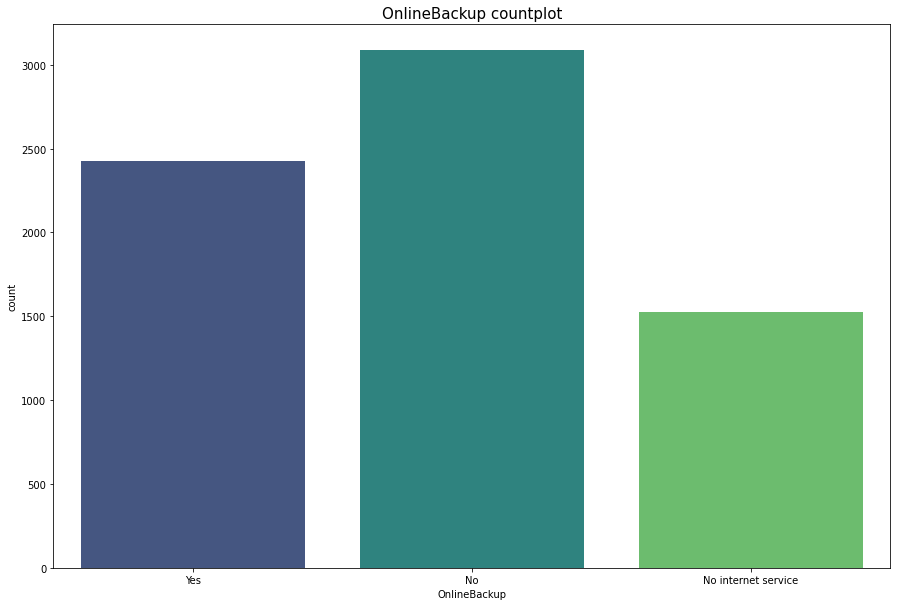

In [387]:
countplot_function(dataframe = df, column = "OnlineBackup")

Seems majority of the subscribers do not have an online backup. 

## PaymentMethod Factor

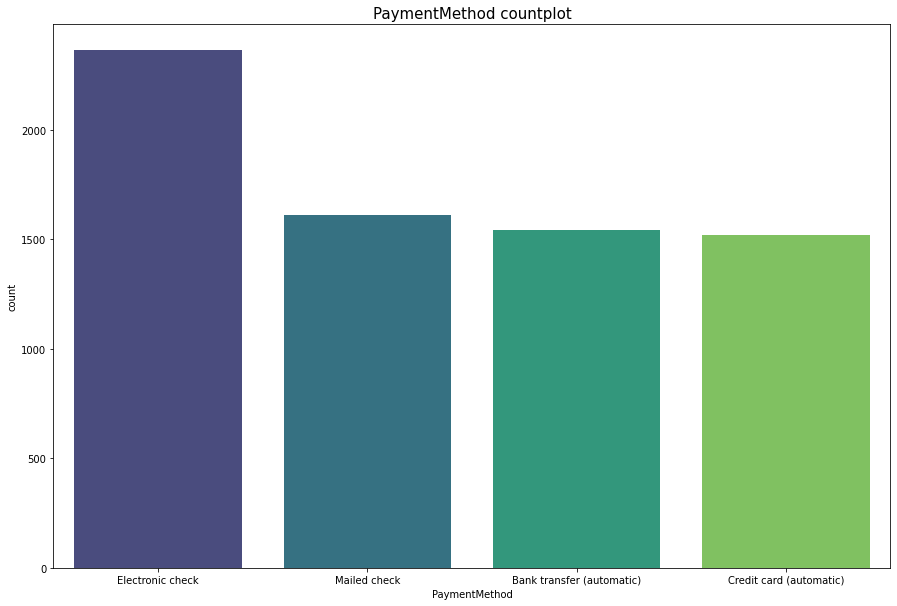

In [388]:
countplot_function(dataframe = df, column = "PaymentMethod")

About half of the subscribers prefer electronic check above other payment methods. The other 3 payment methods seem to be equally popular amongst themselves sitting at roughly 1/5th of the subscribers each.

## Contract Factor

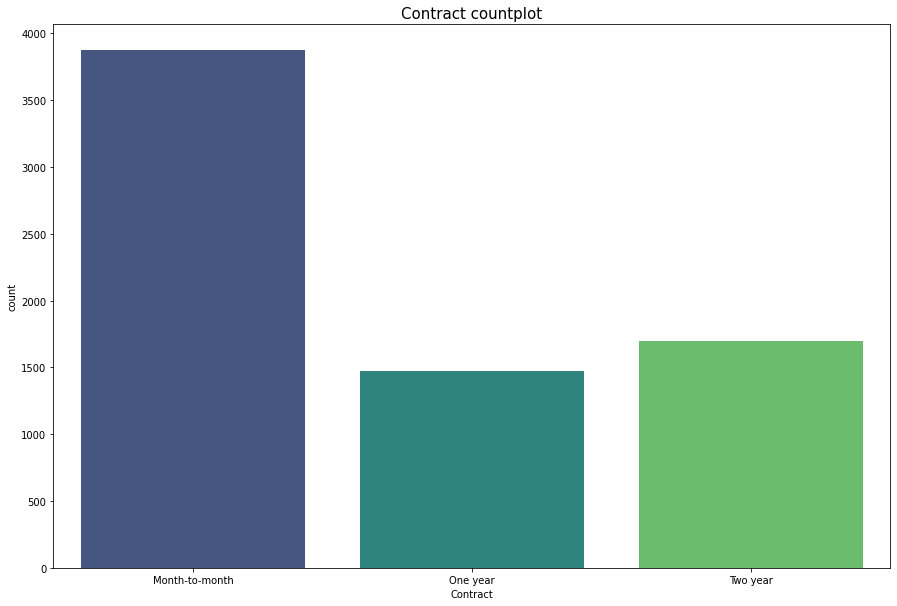

In [389]:
countplot_function(dataframe = df, column = "Contract")

Most subscribers prefer sticking to a monthly subscription rather than being tied up in a one year or two year contract.

## Actual Churn

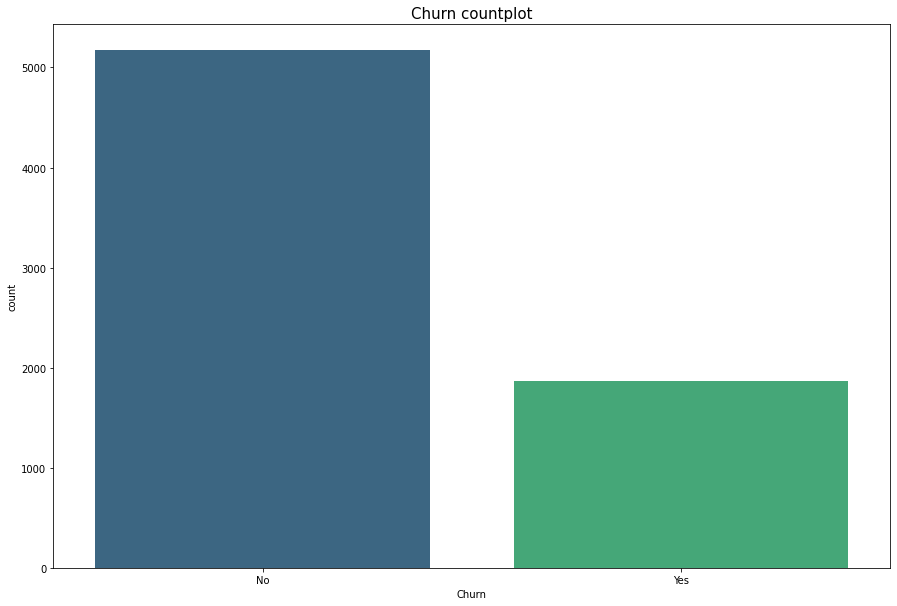

In [390]:
countplot_function(dataframe = df, column = "Churn")

In [391]:
def boxplot_function(dataframe, x_value, y_value, title_size = 15, label_size = 10, figsize = (15, 10), palette = "viridis"):
    plt.figure(figsize = (figsize))
    sns.boxplot(x = x_value, y = y_value, data = dataframe, palette = palette)
    plt.xlabel("{} Value".format(x_value), fontsize = label_size)
    plt.ylabel("{} Value".format(y_value), fontsize = label_size)
    plt.title("{} Vs. {} Boxplot".format(x_value, y_value), fontsize = title_size)
    plt.show()

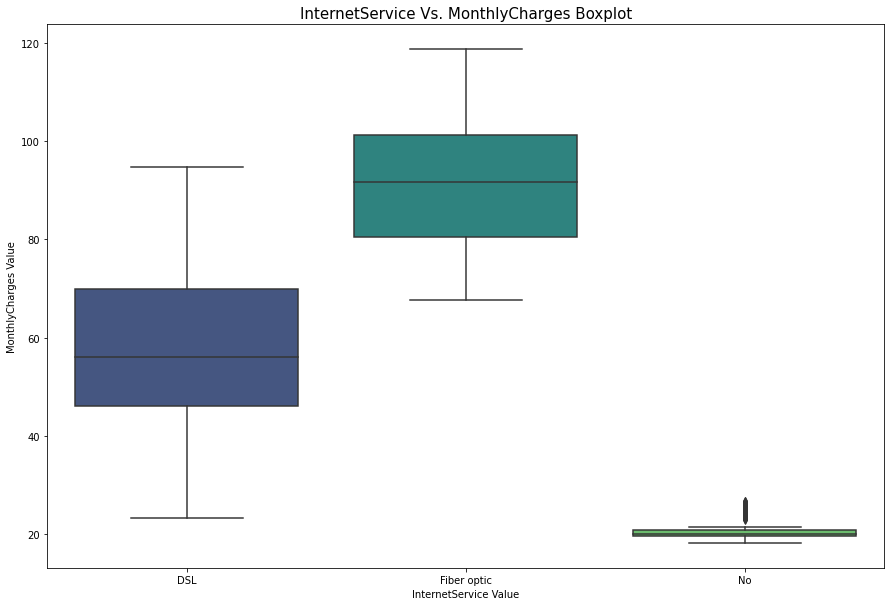

In [392]:
boxplot_function(dataframe = df, x_value = "InternetService", y_value = "MonthlyCharges")

From the boxplots, we can make out that those with Fiber Optic connection have the highest monthly charge with the DSL connection subscribers having significantly lower monthly charges. Those not having an internet connection have pretty much the lowest monthly charges with an almost constant value.

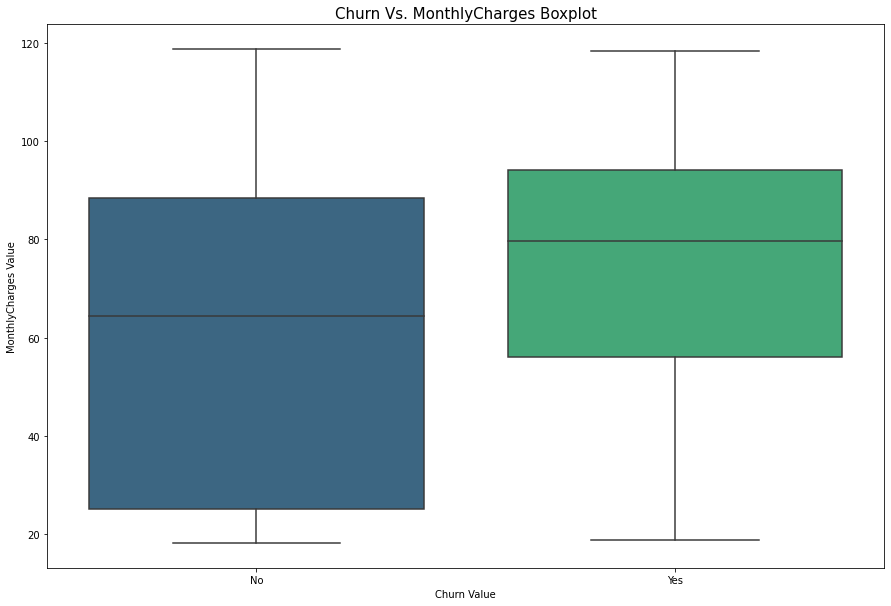

In [393]:
boxplot_function(dataframe = df, x_value = "Churn", y_value = "MonthlyCharges")

The above boxplot shows in a general trend that those with higher monthly charges churn faster. Those with lower monthly charge are pretty much less likely to churn.

In [394]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', '1394.55'))

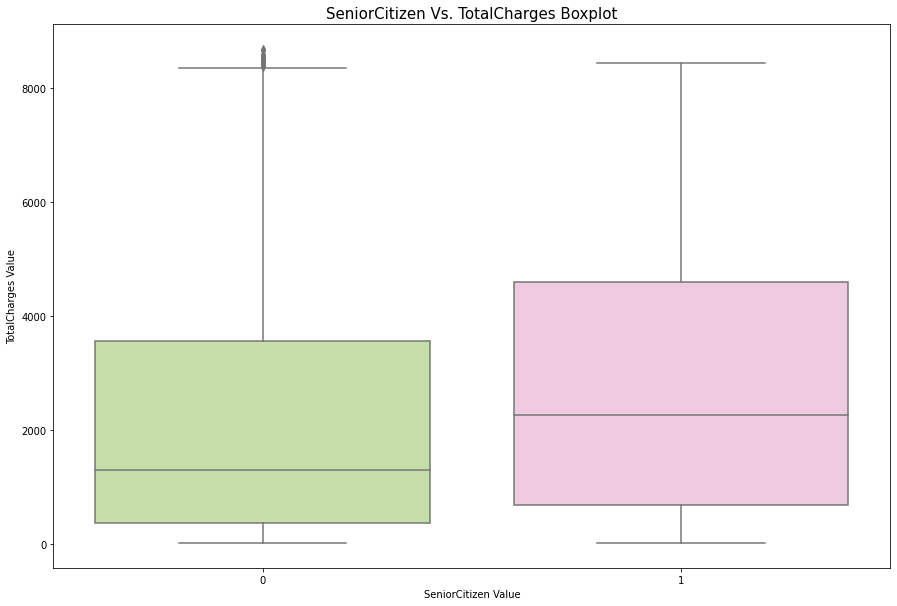

In [395]:
boxplot_function(dataframe = df, x_value = "SeniorCitizen", y_value = "TotalCharges", palette = random.choice(palette_values))

This boxplot shows that senior citizens are likely to spend more for telecom services in total.

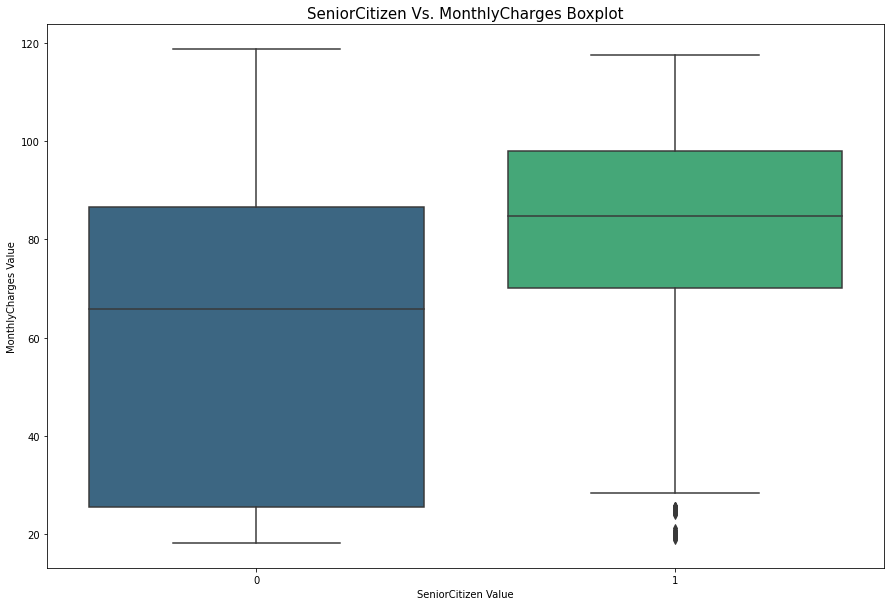

In [396]:
boxplot_function(dataframe = df, x_value = 'SeniorCitizen', y_value = 'MonthlyCharges')

Very much in line with out boxplot for total charges, we see that monthly charges for senior citizens are generally more.

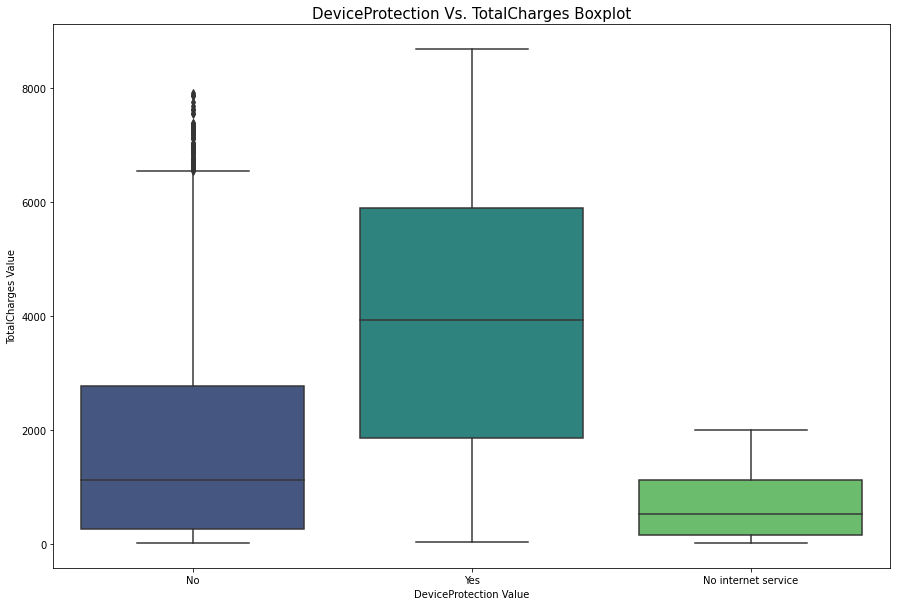

In [397]:
boxplot_function(dataframe = df, x_value = "DeviceProtection", y_value = "TotalCharges")

We can see that device protection significantly adds up to the total charges. 

In [398]:
def barplot_function(dataframe, x_value, y_value, hue = None, title_size = 15, label_size = 10, figsize = (15, 10), palette = "viridis"):
    plt.figure(figsize = (figsize))
    sns.barplot(x = x_value, y = y_value, data = dataframe, hue = hue, palette = palette)
    plt.xlabel("{} Value".format(x_value), fontsize = label_size)
    plt.ylabel("{} Value".format(y_value), fontsize = label_size)
    plt.title("{} Vs. {} Boxplot".format(x_value, y_value), fontsize = title_size)
    plt.show()

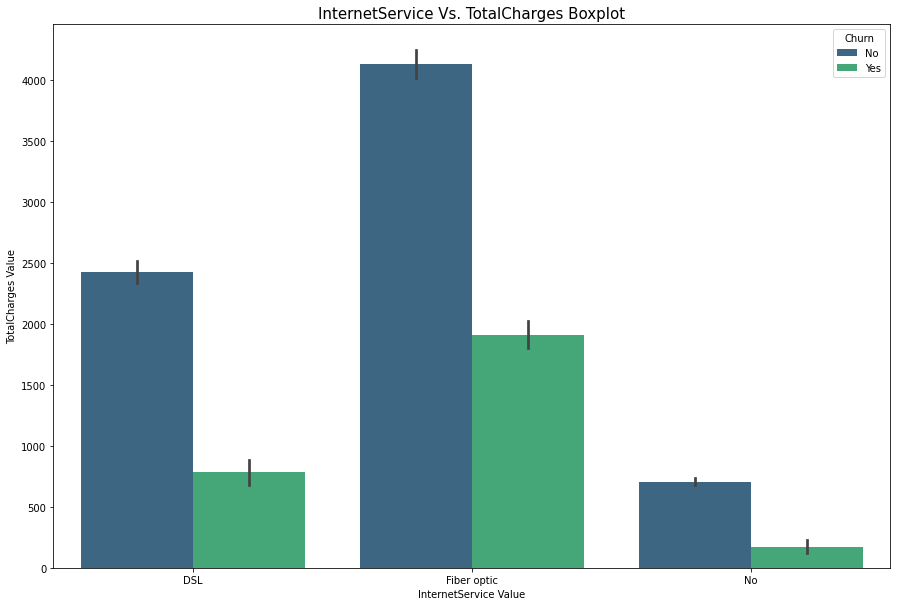

In [399]:
barplot_function(dataframe = df, x_value = 'InternetService', y_value = 'TotalCharges',
                 hue = 'Churn')

Data shows those opting for fiber optic internet service generally have a higher churn ratio as compared to DSL and no internet service.

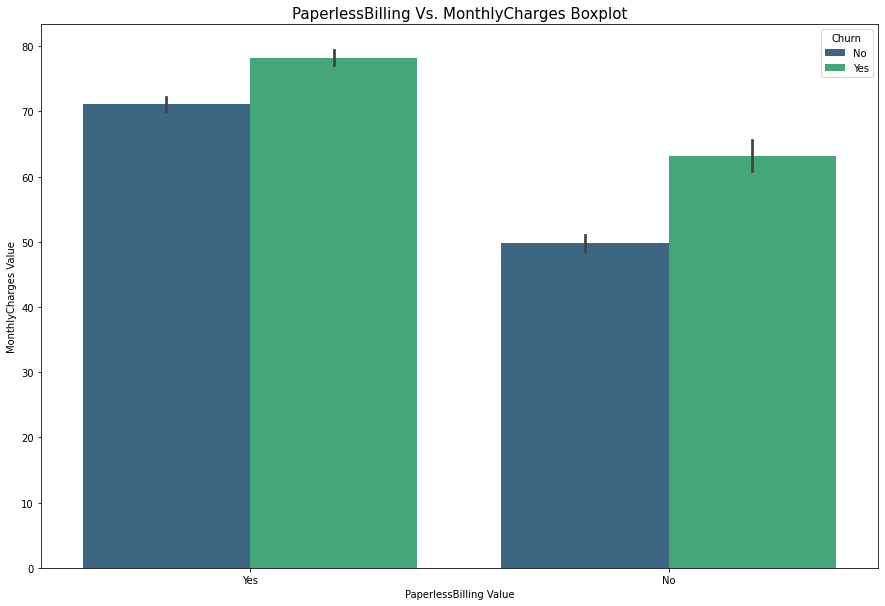

In [400]:
barplot_function(dataframe = df, x_value = 'PaperlessBilling', y_value = 'MonthlyCharges', hue = 'Churn')


Paperless billing customers usually leverage the freedom to use their credit/debit cards and pay more amount compared to the others who prefer paper billing options. This is because it is more convenient to use credit/debit cards to make transaction compared to other services. Hence, whenever a new customer is going to register for the service, Telco can estimate the total charges that might be taken into consideration based on whether a customer opts for paperless billing or not. 

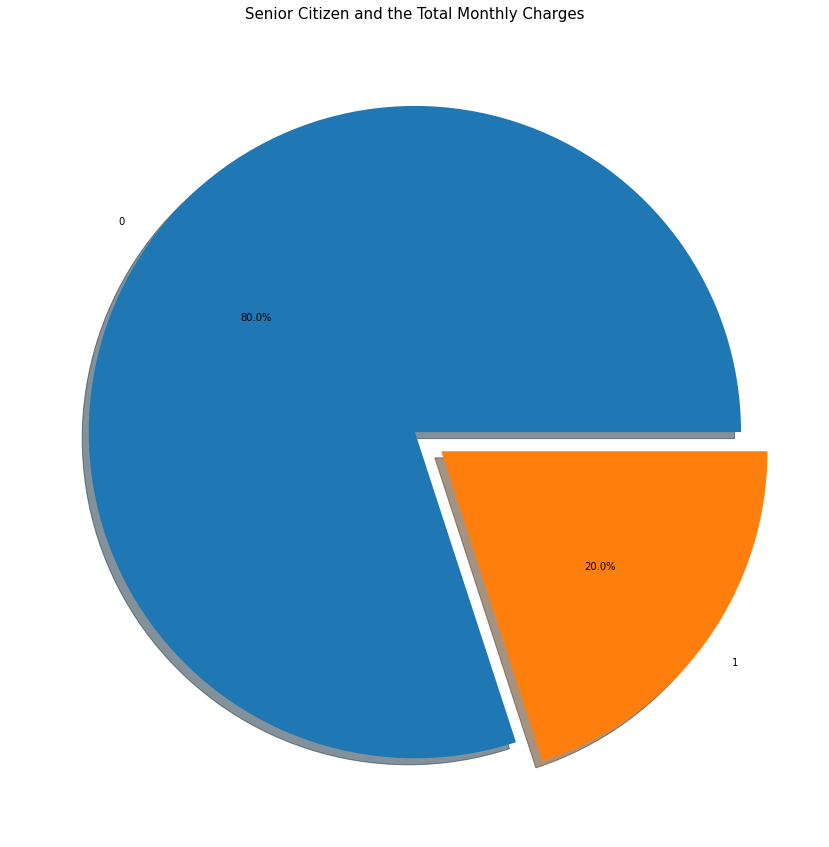

In [401]:
plt.figure(figsize = (15, 15))
plt.pie(x = df.groupby(by = 'SeniorCitizen').sum()['MonthlyCharges'], labels = df.groupby(by = 'SeniorCitizen').sum().index,
       explode = (0, 0.1), shadow = True,
       autopct = '%1.1f%%')
plt.title('Senior Citizen and the Total Monthly Charges', fontsize = 15)
plt.show()

Based on the plots, it could be seen that senior citizens pay less amount compared to the non-seniors as shown in the above plot respectively. We have taken the total sum of the monthly charges for senior citizens by grouping them based on their classes as shown in the pie plot above.

In [402]:
df.groupby(by = 'PhoneService').sum()['MonthlyCharges']

PhoneService
No      28663.5
Yes    427453.1
Name: MonthlyCharges, dtype: float64

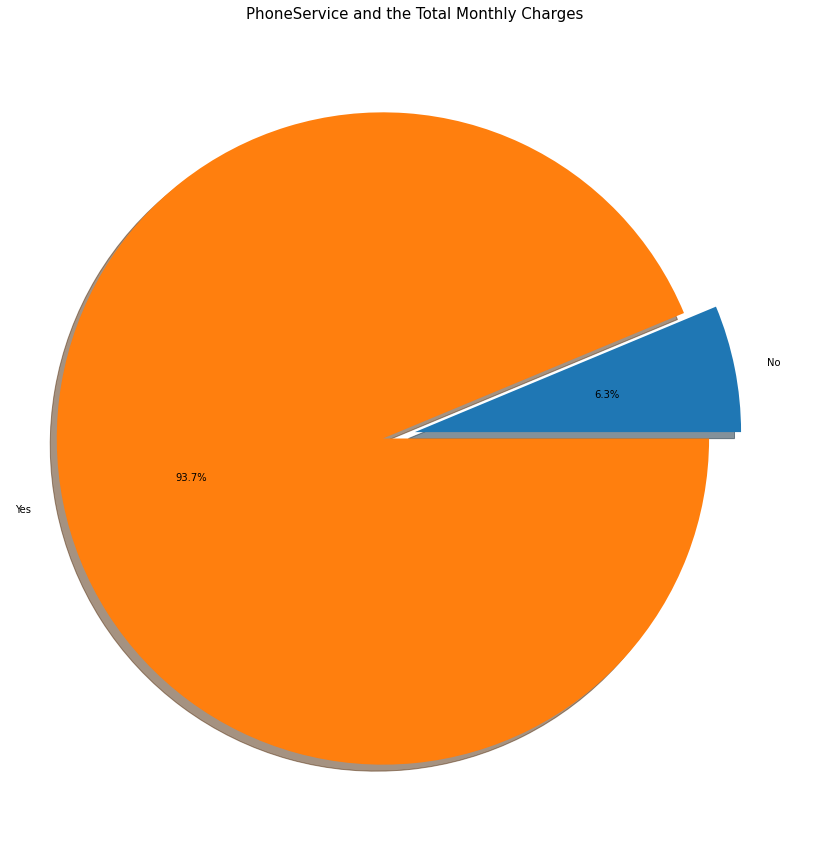

In [403]:
plt.figure(figsize = (15, 15))
plt.pie(x = df.groupby(by = 'PhoneService').sum()['MonthlyCharges'], labels = df.groupby(by = 'PhoneService').sum().index,
       explode = (0, 0.1), shadow = True,
       autopct = '%1.1f%%')
plt.title('PhoneService and the Total Monthly Charges', fontsize = 15)
plt.show()

People who have enrolled in the phone service have a significantly higher proportion of the amount that is payed monthly. People who did not enroll in the phone service has lower proportion of the amount that is payed monthly.

In [404]:
df.groupby(by = 'InternetService').sum()['MonthlyCharges']

InternetService
DSL            140665.35
Fiber optic    283284.40
No              32166.85
Name: MonthlyCharges, dtype: float64

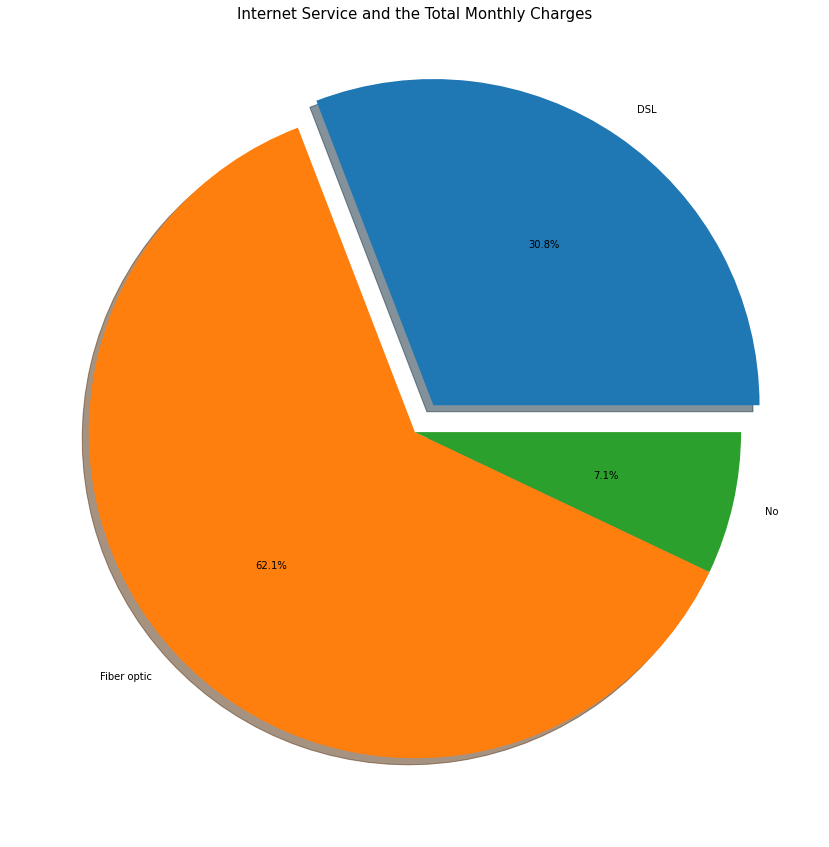

In [405]:
plt.figure(figsize = (15, 15))
plt.pie(x = df.groupby(by = 'InternetService').sum()['MonthlyCharges'], labels = df.groupby(by = 'InternetService').sum().index,
       explode = (0.1, 0, 0), shadow = True,
       autopct = '%1.1f%%')
plt.title('Internet Service and the Total Monthly Charges', fontsize = 15)
plt.show()

The total charges were significantly higher for the Fiber optic customers compared to the other options as indicated in the plots shown above. There are other factors as well that would influence the monthly charges which in turn would influence whether a customer would churn from the service.

In [406]:
df_categorical = df.select_dtypes(include = "object")

In [407]:
df_numerical = df.select_dtypes(exclude = "object")

In [408]:
df_categorical.drop(['customerID'], axis = 1, inplace = True)

In [409]:
pd.get_dummies(df_categorical.gender, drop_first = True).head()

,Male
0,0
1,1
2,1
3,1
4,0


In [410]:
df_dummy_encoding = pd.get_dummies(df_categorical, drop_first = True)

In [411]:

df_final = pd.concat([df_dummy_encoding, df_numerical], axis = 1)

In [412]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825466
MonthlyCharges,0.220173,0.247900,1.000000,0.650865
TotalCharges,0.102652,0.825466,0.650865,1.000000


## Heatmap

Heatmaps are a good way to visualize our data and understanding trends from it. In our case, we consider the correlation between all the set of features and compute the correlation coefficients. But interpreting the numerical vector (correlation coefficient vector) can be tedious and quite difficult to comprehend. Therefore, we will now be using Heatmap plots which generate brightened colors if they find a particular value to be high or vice-versa. The reverse might also be true depending on the 'cmap' or 'palette' that we select for our heatmaps. 

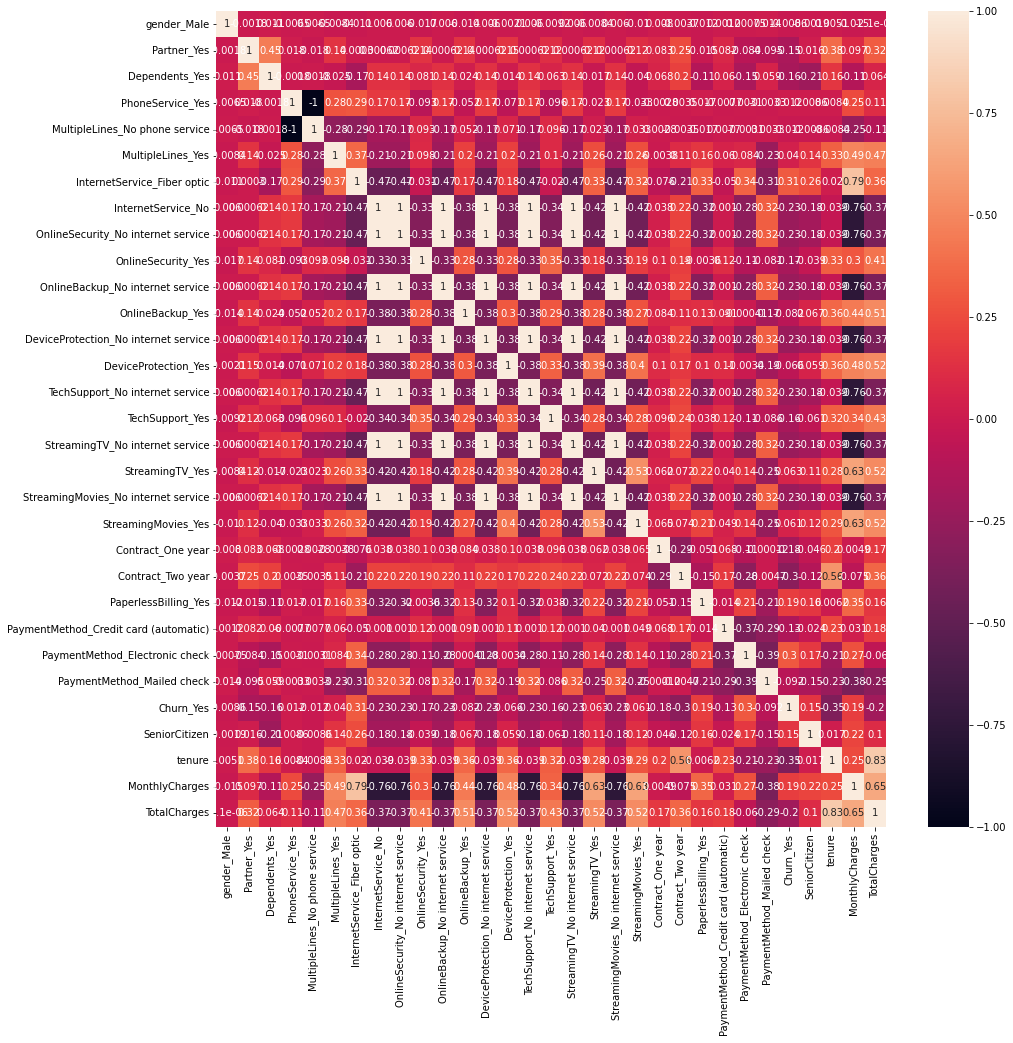

In [413]:
plt.figure(figsize = (15, 15))
sns.heatmap(df_final.corr(), annot = True)
plt.show()

Based on the heatmap given, it could be seen that there is a strong correlation between the TotalCharges and the Tenure of staying in a service. This is true in real-life because the longer a customer stays in a service, the more willing he/she are going to be using that same service along with additional features or add-ons as well. It could also be seen that people who have opted for phone services from Telco did not opt for multiple lines of the same service. Therefore, we get to know that customers are open to adding multiple lines of different service providers rather than staying with the same phone service provider. Monthly charges are negatively correlated with whether a person has internet service, online security, online backup internet security, internet tech support, streaming TV service and streaming movies service. 
There are many other interesting trends in the data which we could find based on our analysis. But these observations are the most important and they could be used by the decision making committee to ensure that they get the best results. 

In [414]:
X = df_final.drop(['Churn_Yes'], axis = 1)
y = df_final['Churn_Yes']

## Train Test Split

It is now time to split our data into training and cross-validation data. This is because, we need to test whether our model is performing well on the unseen class (cross-validation and test data). We need to use cross-validation data to tune the hyperparameters and improve the performance of the best machine learning models.

We are going to be dividing the data in such a way whether the training data contains around 70% of the records and the test data contains around 30% of the records respectively. Below the code that implements these steps. 

In [415]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv  = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Standardization

When we take data that is present in many scales, it can sometimes make the machine leanring models to assume that a particular feature is more important due to the fact that it is of an entirely different scale and so on. Therefore, we need to ensure that the entire data is of the same scale so that all the features are treated equally without giving more importance to one particular feature than the other. 

We perform standardization by taking the mean of a particular feature and subtracting from all the values from that particular feature and divide the results from the standard deviation of the same feature itself. This method is continued for all the features until each and every feature has a mean of 0 and a standard deviation of 1. Below are the set of steps that are performed to standardize the features. 

In [416]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_cv_transformed = scaler.transform(X_cv)

In [417]:
len(X_train_transformed)

4930

In [418]:
len(X_cv_transformed)

2113

In [419]:
from sklearn.decomposition import PCA

In [420]:
pca = PCA(n_components = 30)
pca.fit(X_train_transformed)
X_train_reduced = pca.transform(X_train_transformed)
X_cv_reduced = pca.transform(X_cv_transformed)

In [421]:
X_train_reduced.shape

(4930, 30)

In [422]:
X_train_transformed.shape

(4930, 30)

In [423]:
principal_components = list(range(1, len(pca.explained_variance_ratio_) + 1))

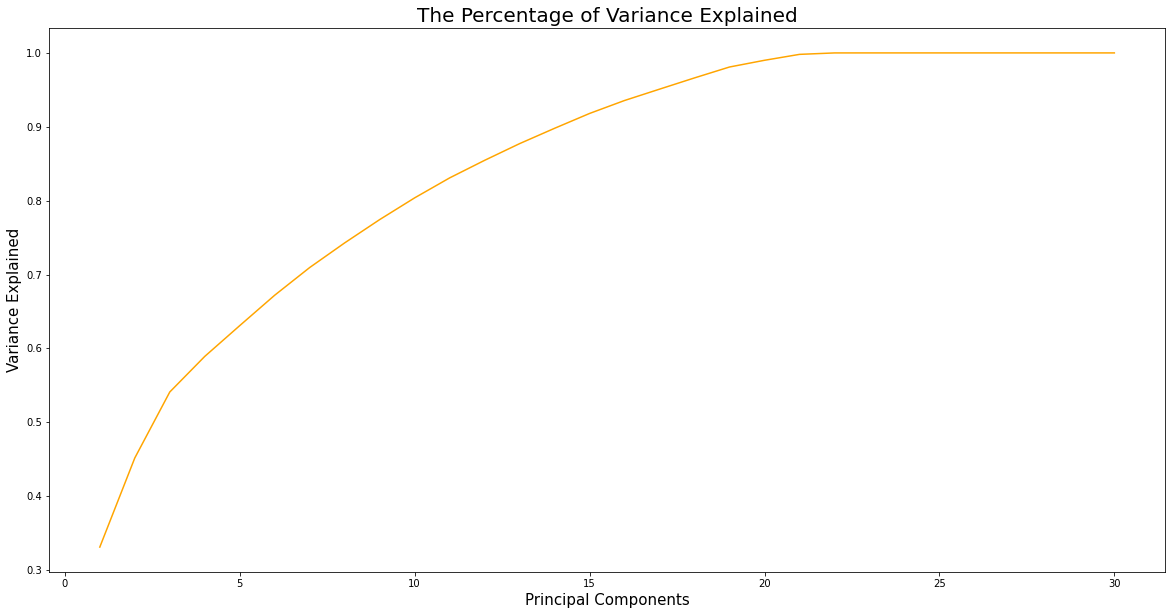

In [424]:
plt.figure(figsize = (20, 10))
sns.lineplot(principal_components, np.cumsum(pca.explained_variance_ratio_), color = 'orange')
plt.xlabel('Principal Components', fontsize = 15)
plt.ylabel('Variance Explained', fontsize = 15)
plt.title("The Percentage of Variance Explained", fontsize = 20)
plt.show()

Printing the shape of the dataframe to get an understanding of the number of rows and columns we would be dealing with for our data. 

In [425]:
print(len(X_train_transformed))

4930


Printing the shape of the cross-validation dataframe to get an understanding of the number of rows and columns we would be dealing with for our data. 

In [426]:
print(len(X_cv_transformed))

2113


Checking to see for the training data whether we have equal number of classes. But it could be seen that there is class imbalance as we have seen earlier in the plots as well. In the next few cells, we would be performing class balancing so that the ML models learn to represent both the classes of interest with equal probability. 

In [427]:
y_train.value_counts()

0    3628
1    1302
Name: Churn_Yes, dtype: int64

Similarly, we can also take a look at the cross-validation data and find out the total number of classes and the count of them to see if there is a class imbalance respectively. 

In [428]:
y_cv.value_counts()

0    1546
1     567
Name: Churn_Yes, dtype: int64

In [429]:
len(X_train_transformed[0])

30

## K Neighbors Classifier

Since the output variable that we are going to be predicting is discrete, we are going to be using various machine learning classifiers for our task of predicting whether a customer is going to churn from a service or not. 

__Note:__ We would be first performing class balancing which can be done with the library "imbalanced-learn" that can also be dowloaded using simple "pip" or "conda" commands. Below is the cell you might uncomment and run if you do not have this library installed already. 

In [430]:
#!pip install -U imbalanced-learn

## Class Balancing

One of the most popular methods to perform class balancing is with SMOTE. We will initialize it and fit our training and cross-validation data points which ensure that we have equal number of classes which we are interested to work and proceed. Below is the code sample that exactly shows all these steps. 

In [431]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X_train_transformed, y_train = sampler.fit_resample(X_train_transformed, y_train)
X_cv_transformed, y_cv = sampler.fit_resample(X_cv_transformed, y_cv)

After performing the class balancing, we are now going to fit our data with the K Neighbors Classifier and understand the performance of the models and their predictions respectively. 

In [432]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

## Confusion Matrix

A confusion matrix would give us the values between the actual and the predicted outcomes. If we have a 2 class problem, we would be getting a 2 * 2 matrix that would basically give us the predictions and the actual values respectively. 

In [433]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
print(confusion_matrix(y_cv, y_predictions))

[[1056  490]
 [ 407 1139]]


## Classification Report

Classification report gives a very good understanding of the precision, recall and the f1-score along with accuracy that are important metrics that we generally consider when measuring the performance of a general classifier model. Therefore, we would be taking into account the classification report and checking to see the values and comparing them with other models in order to pick the best model for our task for predicting whether a customer is going to churn or not. 

In [434]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1546
           1       0.70      0.74      0.72      1546

    accuracy                           0.71      3092
   macro avg       0.71      0.71      0.71      3092
weighted avg       0.71      0.71      0.71      3092



## Plot Confusion Matrix

Rather than taking only a look at the numerical values, it is better to plot the confusion matrix along with their color coded outputs so that we can better access the performance of the classifier model at hand. 

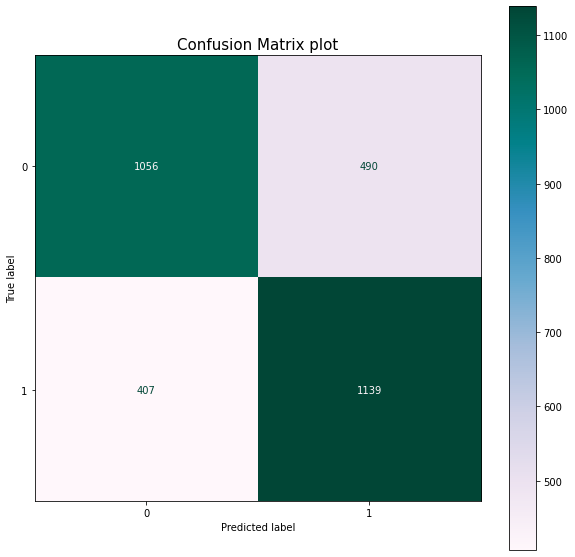

In [435]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'PuBuGn')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

## ROC AUC Curves

We can also understand the performance of the model by taking into account the AUC (Area under the curve) and checking if the values is close to 1. The higher is the value of AUC, the better the model is said to be performing and vice-versa. Below is the plot to get an understanding of the performance of the ML model. 

AUC for our classifier is: 0.7650651683851328


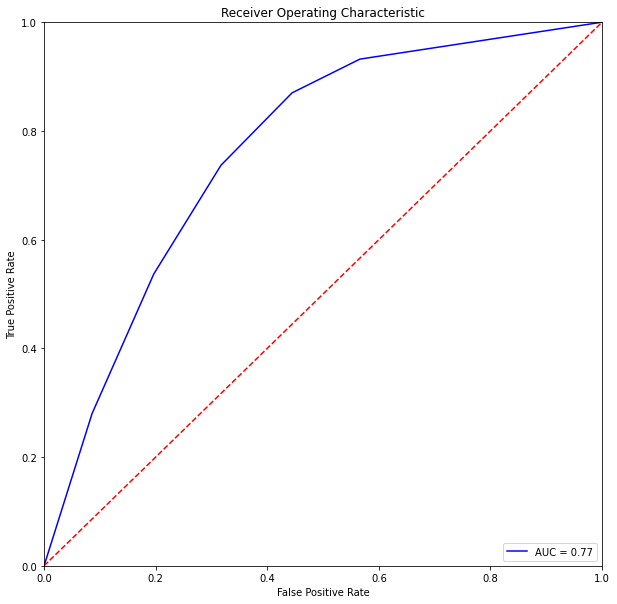

In [436]:


from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Support Vector Classifier

Support vector classifier is also a popular machine learning classifier that can be used to predict whether a customer is going to churn from a service or not. A support vector machine (SVM) is machine learning algorithm that analyzes data for classification and regression analysis. SVM is a supervised learning method that looks at data and sorts it into one of two categories. An SVM outputs a map of the sorted data with the margins between the two as far apart as possible. SVMs are used in text categorization, image classification, handwriting recognition and in the sciences.

__Source:__ https://www.techopedia.com/definition/30364/support-vector-machine-svm

In [437]:
model = SVC(probability = True)
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

## Confusion Matrix

Let us now check the confusion matrix to find out how our model is performing on the cross-validation data. 

In [438]:
print(confusion_matrix(y_cv, y_predictions))

[[1214  332]
 [ 340 1206]]


## Classification Report

We can now take a look at a few metrics and understand the performance of the Support Vector Classifier. We consider values from metrics such as precision, recall, f1-score along with accuracy to access the model performance. 

In [439]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1546
           1       0.78      0.78      0.78      1546

    accuracy                           0.78      3092
   macro avg       0.78      0.78      0.78      3092
weighted avg       0.78      0.78      0.78      3092



## Plot Confusion Matrix

Let us know plot the confusion matrix to see the performance of the SVM classifier respectively. Below is the plot that shows the output based on the actual values and the predicted values. 

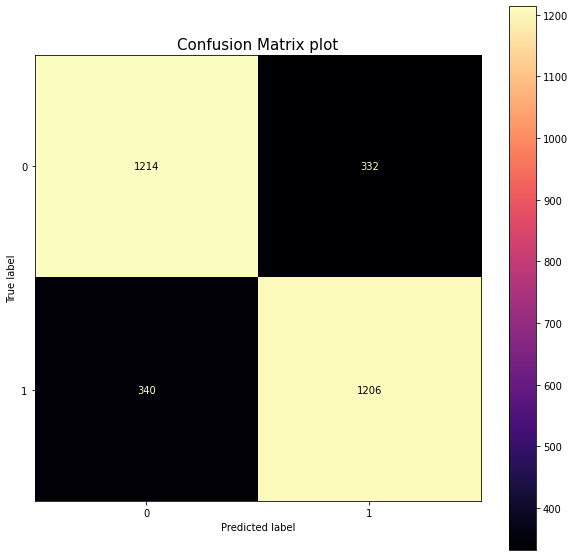

In [440]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'magma')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

## ROC AUC Curves

We can now consider the AUC and check the performance of the model. One thing to note is that the higher the value of AUC, the better is the model performing on the cross-validation data. Let us now see the performance of the support vector classifier. 

AUC for our classifier is: 0.8683139228388914


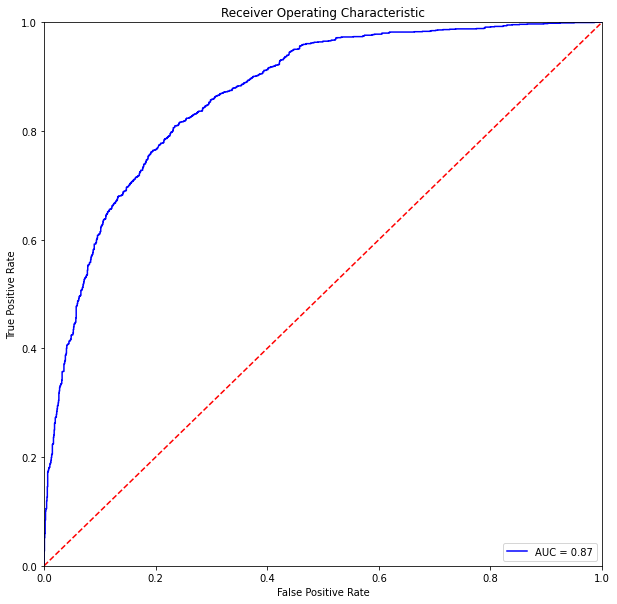

In [441]:


from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression

In [442]:
model = LogisticRegression()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [443]:
print(confusion_matrix(y_cv, y_predictions))

[[1175  371]
 [ 306 1240]]


In [444]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1546
           1       0.77      0.80      0.79      1546

    accuracy                           0.78      3092
   macro avg       0.78      0.78      0.78      3092
weighted avg       0.78      0.78      0.78      3092



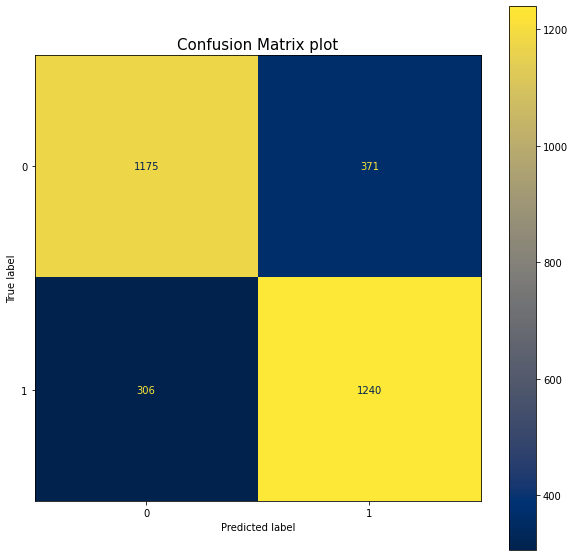

In [445]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'cividis')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.8573860013488885


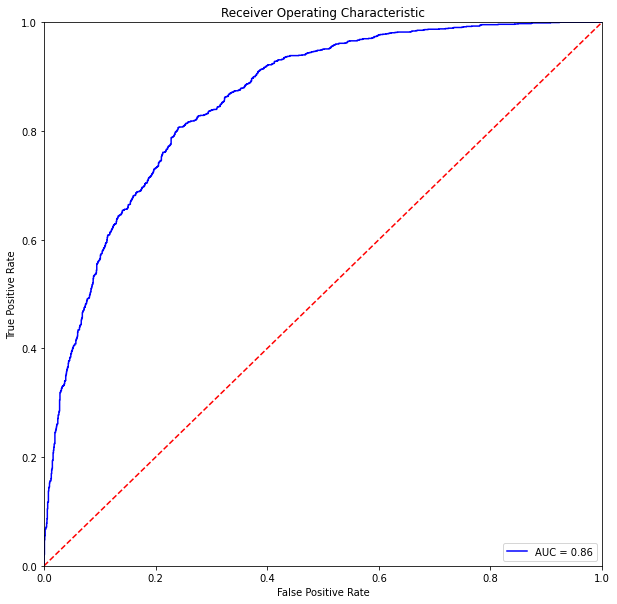

In [446]:


from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree Classifier

In [447]:
model = DecisionTreeClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [448]:
print(confusion_matrix(y_cv, y_predictions))

[[1232  314]
 [ 535 1011]]


In [449]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.70      0.80      0.74      1546
           1       0.76      0.65      0.70      1546

    accuracy                           0.73      3092
   macro avg       0.73      0.73      0.72      3092
weighted avg       0.73      0.73      0.72      3092



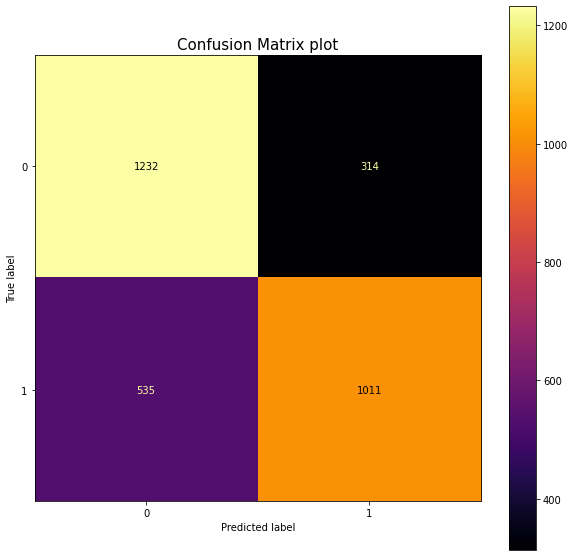

In [450]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'inferno')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.7281021088516206


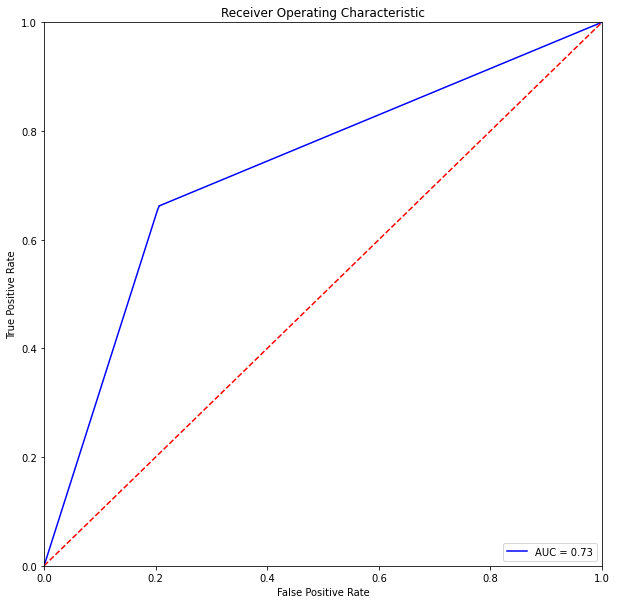

In [451]:


from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gaussian Naive Bayes

In [452]:
model = GaussianNB()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [453]:
print(confusion_matrix(y_cv, y_predictions))

[[ 959  587]
 [ 209 1337]]


In [454]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.82      0.62      0.71      1546
           1       0.69      0.86      0.77      1546

    accuracy                           0.74      3092
   macro avg       0.76      0.74      0.74      3092
weighted avg       0.76      0.74      0.74      3092



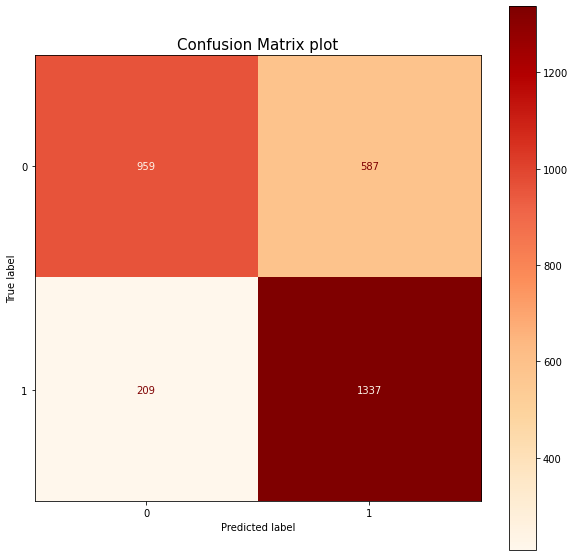

In [455]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'OrRd')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.831101084633549


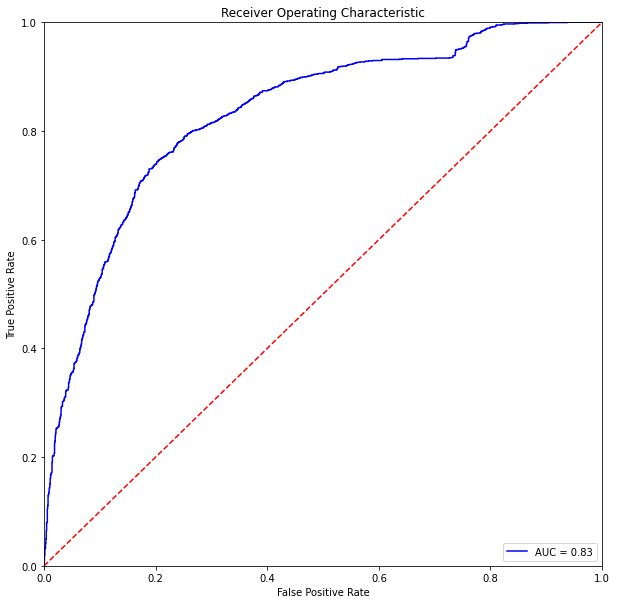

In [456]:


from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest Classifier

In [457]:
model = RandomForestClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [458]:
print(confusion_matrix(y_cv, y_predictions))

[[1324  222]
 [ 453 1093]]


In [459]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1546
           1       0.83      0.71      0.76      1546

    accuracy                           0.78      3092
   macro avg       0.79      0.78      0.78      3092
weighted avg       0.79      0.78      0.78      3092



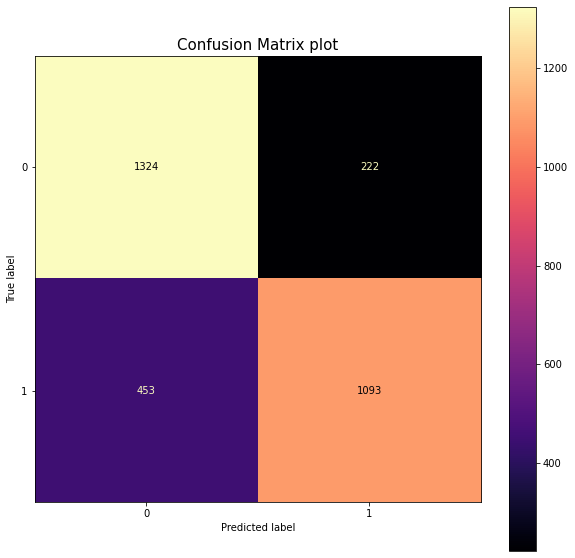

In [460]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'magma')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.8778553007469093


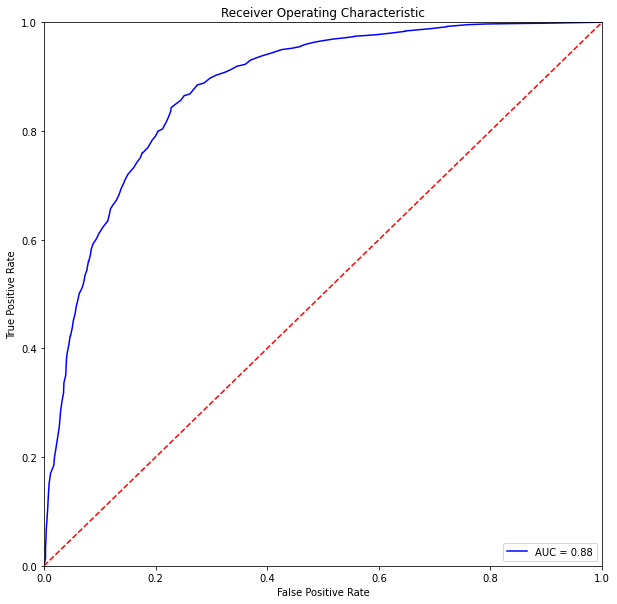

In [461]:

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Xgb Classifier

In [462]:
#!pip install xgboost

In [463]:
model = xgb.XGBClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [464]:
print(confusion_matrix(y_cv, y_predictions))

[[1287  259]
 [ 232 1314]]


In [465]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1546
           1       0.84      0.85      0.84      1546

    accuracy                           0.84      3092
   macro avg       0.84      0.84      0.84      3092
weighted avg       0.84      0.84      0.84      3092



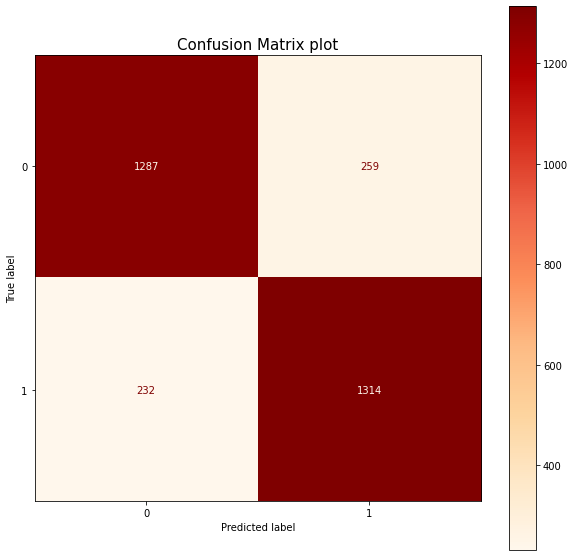

In [466]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'OrRd')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.9273522707684481


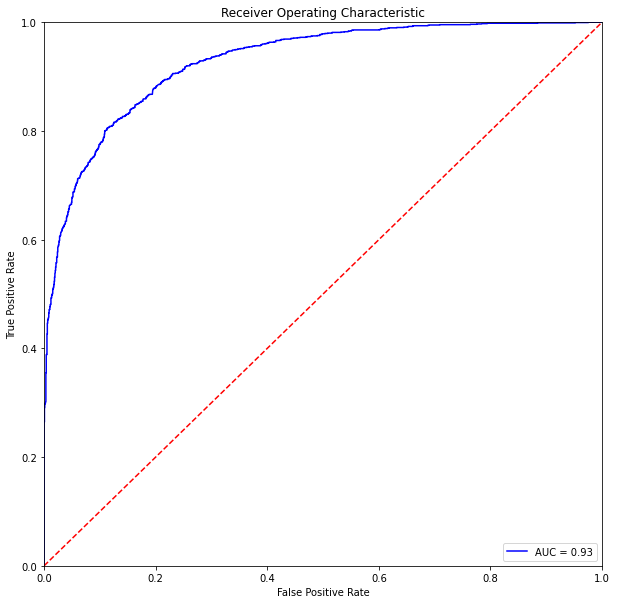

In [467]:


from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Observation:
1. It could be seen from the above plots that the XBG model is performing better than all the remaining models that we have tried and tested as shown above. 
2. Therefore, we will now use our XGB model and perform hyperparameter tuning to get the best results and improving the AUC even further. 

## Hyperparameter Tuning of XGB model

In [468]:
sub_sample = [0.1, 0.2, 0.3, 0.5, 0.7, 1]

In [469]:
for sample_value in sub_sample:
    model = xgb.XGBClassifier(subsample = sample_value, eval_metric = 'logloss', n_jobs = -1)
    model.fit(X_train_transformed, y_train)        
    y_predictions = model.predict(X_cv_transformed)
    print("The percentage of samples used in XGB model = {}%".format(np.round(sample_value * 100, 2)))
    print(classification_report(y_predictions, y_cv))
    print("\n")

The percentage of samples used in XGB model = 10.0%
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1539
           1       0.83      0.82      0.82      1553

    accuracy                           0.82      3092
   macro avg       0.82      0.82      0.82      3092
weighted avg       0.82      0.82      0.82      3092



The percentage of samples used in XGB model = 20.0%
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1517
           1       0.85      0.83      0.84      1575

    accuracy                           0.84      3092
   macro avg       0.84      0.84      0.84      3092
weighted avg       0.84      0.84      0.84      3092



The percentage of samples used in XGB model = 30.0%
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1531
           1       0.84      0.83      0.84      1561

    accuracy          

In [470]:
max_depth_values = [1, 2, 3, 5, 10, 50, 100]

for depth in max_depth_values:
    model = xgb.XGBClassifier(max_depth = depth, eval_metric = 'logloss', n_jobs = -1)
    model.fit(X_train_transformed, y_train)
    print("The depth of the trees = {}".format(depth, 2))
    y_predictions = model.predict(X_cv_transformed)
    print(classification_report(y_predictions, y_cv))
    print("\n")

The depth of the trees = 1
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1458
           1       0.83      0.78      0.80      1634

    accuracy                           0.80      3092
   macro avg       0.80      0.80      0.80      3092
weighted avg       0.80      0.80      0.80      3092



The depth of the trees = 2
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1489
           1       0.85      0.82      0.84      1603

    accuracy                           0.83      3092
   macro avg       0.83      0.83      0.83      3092
weighted avg       0.83      0.83      0.83      3092



The depth of the trees = 3
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1519
           1       0.85      0.84      0.84      1573

    accuracy                           0.84      3092
   macro avg       0.84      0.84      0.84

In [471]:
num_estimator_values = [1, 2, 5, 10, 20, 50, 100, 500]
for estimators in num_estimator_values:
    model = xgb.XGBClassifier(n_estimators = estimators, eval_metric = 'logloss', n_jobs = -1)
    model.fit(X_train_transformed, y_train)
    y_predictions = model.predict(X_cv_transformed)
    print("The total number of estimators used in XGB model = {}".format(estimators))
    print(classification_report(y_predictions, y_cv))
    print("\n")

The total number of estimators used in XGB model = 1
              precision    recall  f1-score   support

           0       0.58      0.88      0.70      1019
           1       0.92      0.69      0.79      2073

    accuracy                           0.75      3092
   macro avg       0.75      0.78      0.74      3092
weighted avg       0.81      0.75      0.76      3092



The total number of estimators used in XGB model = 2
              precision    recall  f1-score   support

           0       0.58      0.88      0.70      1019
           1       0.92      0.69      0.79      2073

    accuracy                           0.75      3092
   macro avg       0.75      0.78      0.74      3092
weighted avg       0.81      0.75      0.76      3092



The total number of estimators used in XGB model = 5
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1330
           1       0.86      0.75      0.80      1762

    accuracy       

In [472]:
best_number_of_estimators = 100
best_subsamples = 1
best_max_depth_values = 2

model = xgb.XGBClassifier(n_estimators = best_number_of_estimators, max_depth = best_max_depth_values, 
                         subsample = best_subsamples, eval_metric = 'logloss', n_jobs = -1)
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)
print(classification_report(y_predictions, y_cv))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1489
           1       0.85      0.82      0.84      1603

    accuracy                           0.83      3092
   macro avg       0.83      0.83      0.83      3092
weighted avg       0.83      0.83      0.83      3092



In [473]:
print(confusion_matrix(y_cv, y_predictions))

[[1258  288]
 [ 231 1315]]


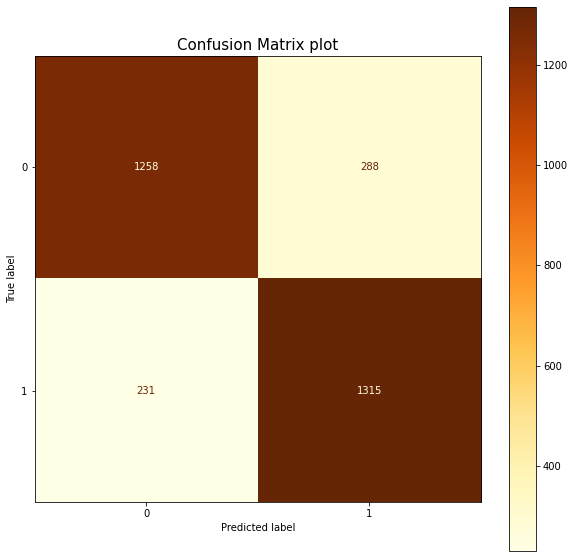

In [474]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv_transformed, y_cv, ax = ax, cmap = 'YlOrBr')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.grid(False)
plt.show()

AUC for our classifier is: 0.9214669915602423


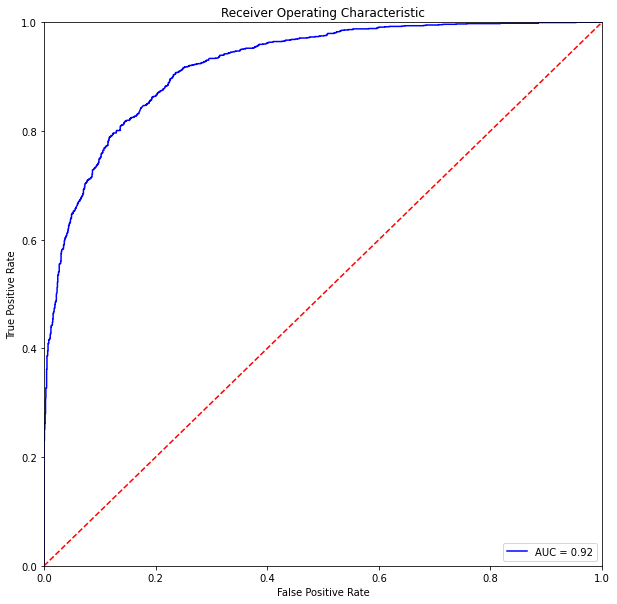

In [475]:


from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Model Evaluation and Interpretation

In [476]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [477]:
print("The precision score of the best XGB model is: {:.2f}".format(precision_score(y_predictions, y_cv)))
print("The recall score of the best XGB model is: {:.2f}".format(recall_score(y_predictions, y_cv)))
print("The f1 score of the best XGB model is: {:.2f}".format(f1_score(y_predictions, y_cv)))
print("The micro f1 score of the best XGB model is: {:.2f}".format(f1_score(y_predictions, y_cv, average = 'micro')))
print("The macro f1 score of the best XGB model is: {:.2f}".format(f1_score(y_predictions, y_cv, average = 'macro')))
print("The accuracy of the best XGB model is: {:.2f}%".format(accuracy_score(y_predictions, y_cv) * 100))

The precision score of the best XGB model is: 0.85
The recall score of the best XGB model is: 0.82
The f1 score of the best XGB model is: 0.84
The micro f1 score of the best XGB model is: 0.83
The macro f1 score of the best XGB model is: 0.83
The accuracy of the best XGB model is: 83.21%


## Observation: 

1. It could be seen based on the results that the model that we have chosen and __hyperparameter tuned (XGboost)__ is performing really well on the cross-validation data. 
2. Therefore, the model would be able to predict whether a customer is going to __churn (leave the service) or not__ with an accuracy of about __85%__ which is not bad for a model that contains imbalanced data along with less number of samples that is completely contrary to a real-world problem that contains millions of customers or data points respectively. 
3. Therefore, we can expect similar performance of the model on the __test data__ as well provided that the distribution of the data does not change compared to the __cross-validation data__. 